# Pertemuan 7

- 1. Basic Morphological Transform (Eroding & Dilating)
- 2. Advance Morphological Transform (Opening, Closing, & Morphological Gradient)
- 3. CUDA Implementation

___
### Maximizing Jetson Nano Perfomance

In [ ]:
# sudo nvpmodel -m 0
# sudo jetson_clocks

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# check OpenCV Version

cv2.__version__

'4.5.3'

___
# 1. Basic Morphological Transform (Eroding & Dilating)

- A set of operations that process images based on shapes. 
- Morphological operations apply a structuring element to an input image and generate an output image.
- Usecase :
    - Removing noise
    - Isolation of individual elements and joining disparate elements in an image.
    - Finding of intensity bumps or holes in an image

## 1.1 Dilating
- This operations consists of convolving an image $A$ with some **kernel** ($B$), which can have any shape or size, usually a **square** or **circle**.
- The kernel $B$ has a defined **anchor point**, usually being the center of the kernel.
- As the kernel $B$ is scanned over the image, we compute the maximal pixel value overlapped by $B$ and **replace** the image pixel in the **anchor point** position with that **maximal value**. 
- This maximizing operation causes **bright regions** within an image to **"grow"** (therefore the name dilation). <br>
<img src="resource/Original_Image.png" style="width:100px; margin-top:10px;"></img>
<img src="resource/Dilation.png" style="width:100px; margin-top:10px;"></img> <br>
<span style="width:100px; padding:5px;">Original Image</span>
<span style="width:100px; padding:5px;">Dilation Image</span>
- Dilation function `cv2.dilate(img, kernel, anchor, iterations)`
- Where :
    - `img` : Input image
    - `kernel` : kernel matrix (ndarray), created using `np.ones()` or `cv2.getStructuringElement()` 
    - `anchor` : Evaluated pixel value on the kernel position, default (-1, -1) as Center of kernel.
    - `iterations` : Number of times dilation aplied to input image.
    
## 1.2 Eroding
- This operation  computes a **local minimum** over the area of given kernel.
- As the kernel $B$ is scanned over the image, we compute the minimal pixel value overlapped by $B$ and replace the image pixel under the **anchor point** with that **minimal value**.<br>
<img src="resource/Original_Image.png" style="width:100px; margin-top:10px;"></img>
<img src="resource/Erosion.png" style="width:100px; margin-top:10px;"></img> <br>
<span style="width:100px; padding:5px;">Original Image</span>
<span style="width:100px; padding:5px;">Erosion Image</span>
- Eroding function `cv2.erode(img, kernel, anchor, iterations)`
- Where :
    - `img` : Input image
    - `kernel` : kernel matrix (ndarray), created using `np.ones()` or `cv2.getStructuringElement()` 
    - `anchor` : Evaluated pixel value on the kernel position, default (-1, -1) as Center of kernel.
    - `iterations` : Number of times erotion aplied to input image.

___
## EXAMPLE 1 : Dilation

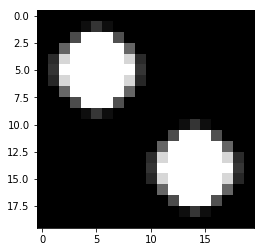

In [3]:
# Create Black Image with two circel

frame = np.zeros((20,20),np.uint8)
cv2.circle(frame, (5,5), 3, (255,255,255), -1, cv2.LINE_AA)
cv2.circle(frame, (14,14), 3, (255,255,255), -1, cv2.LINE_AA)

plt.imshow(frame, cmap="gray")

In [13]:
# Create square kernel 3x3 with all value element = 1

kernel = np.ones((3,3),np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


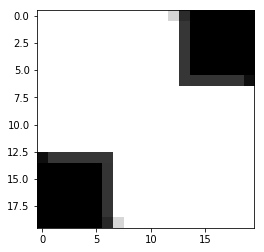

In [15]:
# Apply dilation to black with 2 circle image above using previously created kernel 
dilate = cv2.dilate(frame.copy(), kernel, iterations = 4)

plt.imshow(dilate, cmap="gray")

In [ ]:
# On above result, we can see that apllying Dilation in to black with 2 circle image 
# Giving us the image with a bigger circle (Dilation effect enlarging area of white surface)

___
## EXAMPLE 2 : Erotion

In [12]:
# Create square kernel 3x3 with all value element = 1

kernel = np.ones((3,3),np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


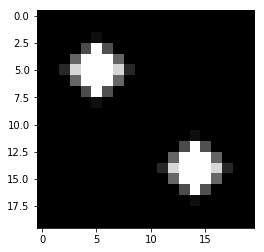

In [19]:
# Apply erotion to black with 2 circle image above using previously created kernel 
eroding = cv2.erode(frame.copy(), kernel, iterations = 1)

plt.imshow(eroding, cmap="gray")

In [ ]:
# On above result, we can see that apllying Erotion in to black with 2 circle image 
# Giving us the image with a smaller circle (Dilation effect shringking area of white surface)

____
## Application : MRI image Denoising using Eroding 

- Using `cv2.erode()` with square kernel 3x3

In [24]:
# read image
img = cv2.imread('noisy_mri.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create kernel & apply to eroding
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(gray, kernel, iterations = 2)

# show result
cv2.imshow("Erosion", erosion)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
## Application : Fixing Broken Character using Dilating

In [29]:
# read image
img = cv2.imread('Broker_Char.png')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply simple thresholding binary
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# create kernel & apply to dilating
kernel = np.ones((5,5),np.uint8)
dilating = cv2.dilate(thresh, kernel, iterations = 5)

cv2.imshow("Dilating", dilating)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
## Appication : Use Eroding & Dilating at the same time for Denoising & Fixing broken line

In [30]:
# read imag
img = cv2.imread('Noised_Broken_Char.png')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply simpel thresholding binary
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# create kernel 3x3
kernel = np.ones((3,3),np.uint8)

# apply eroding to reduce noise in image
erosion = cv2.erode(thresh, kernel, iterations = 3)

# apply dilating to fix broken line
dilating = cv2.dilate(erosion, kernel, iterations = 9)

# normalize dilation effect using eroding
normalize = cv2.erode(dilating, kernel, iterations = 7)


# show result
cv2.imshow("Erosion", erosion)
cv2.imshow("Dilating", dilating)
cv2.imshow("Original", img)
cv2.imshow("normalize", normalize)
cv2.waitKey(0)
cv2.destroyAllWindows()


___
# 2. Advance Morphological Transform 
- Advance Morphological Transform use `cv2.morphologyEx(img, morphological_type, kernel, iterations)`
- where :
    - `img` : input image
    - `morphological_type` : 
        - **Opening** : `cv2.MORPH_OPEN` (**erosion followed by dilation**. It is useful in **removing noise**.)<br>
        <img src="resource/opening.png" style="width:200px"></img>
        - **Closing** : `cv2.MORPH_CLOSE` (**Dilation followed by Erosion**. It is useful in **closing small holes** inside the foreground objects)<br>
        <img src="resource/closing.png" style="width:200px"></img>
        - **Morphological Gradient** : `cv2.MORPH_GRADIENT` (The result will look like the outline of the object.)<br>
        <img src="resource/gradient.png" style="width:200px"></img>
    - `kernel` : kernel matrix (ndarray), created using np.ones() or cv2.getStructuringElement()
    - `iterations` : Number of times method (opening/closing/Gradient) aplied to input image.

___
## 2.1 Opening & Closing

- Implementation Opening on Noisy MRI Image
- Object scale after opening similar to original

In [36]:
# read image
img = cv2.imread('noisy_mri.jpg')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create kernel matrix 3x3
kernel = np.ones((3,3),np.uint8)

# apply advance morphological transform (Opening) 
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)

# show result
cv2.imshow("Opening", opening)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Implementation Closing on Broken Char Image
- Object scale after closing similar to original

In [39]:
# read image
img = cv2.imread('Broken_Char_2.png')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply simple thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# create kernel matrix 3x3
kernel = np.ones((3,3),np.uint8)

# apply advance morphological transform (Closing) 
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=3)


# show image
cv2.imshow("Closing", closing)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Implementation Opening and Closing on Noised & Broken Char Image
    - remove noise using opening
    - join the gap using closing

In [40]:
# read image
img = cv2.imread('Noised_Broken_Char.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply simple thresholding binary
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# create kernel matrix 3x3
kernel = np.ones((3,3),np.uint8)

# apply Advance Morphological Tracsform (Opening & Closing)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=7)


# show result
cv2.imshow("Opening", opening)
cv2.imshow("Closing", closing)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
## 2.2 Morphological Gradient
- Because dilation and erosion mostly affect the pixels that are close to the boundary between the foreground and background, their difference generally yields the boundary and thus this is used for **edge detection and segmentation tasks**.

In [41]:
img = cv2.imread('Char.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3),np.uint8)

# gradient using erosion and dilation
erosion = cv2.erode(thresh, kernel, iterations = 1)
dilation = cv2.dilate(thresh, kernel, iterations = 1)
gradient1 = dilation - erosion

# Morphological Gradient
gradient2 = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel, iterations = 1)

cv2.imshow("Gradient", gradient1)
cv2.imshow("Morphological Gradient", gradient2)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
## EXAMPLE : Morphological Gradient Implementation | Tackling non-uniform illumination in images

- Using Simple Thresholding

In [42]:
# read image
img = cv2.imread('StrukBelanja.png')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply simple thresholding Binary + Otsu's to tackling non-uniform illumination in images (just fro comparison)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# show result
cv2.imshow("Otsu", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Simple Thresholding (Binary)
![](resource/th_binary_ilumination.png)
- Simple Thresholding (To Zero)
![](resource/th_tzr_ilumination.png)

- Using Morphological Gradient

In [44]:
# read image
img = cv2.imread('StrukBelanja.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply Morphological Gradient with kernel 2x2 to tackling non-uniform illumination in images 
kernel = np.ones((2,2),np.uint8)
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)


# apply simple thresholding Binary + Otsu's to tackling non-uniform illumination in images (just fro comparison)
ret, thresh = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# show image
cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("Threshold from Gradient Image", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Morphological Gradient
![](resource/morph_grad_ilumination.png)

___
## EXAMPLE : Fingerprint image with non-uniform illumination

In [45]:
# read image
img = cv2.imread('Fingerprint.png')

# apply bitwise not 
img = cv2.bitwise_not(img)

# covert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply simple thresholding To Zero Inverse
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

# apply morphological gradient with kernel 3x3 to remove illumination in image
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)

# show result
cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("To Zero", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
## EXAMPLE : License Plate With a lot of noise

- read image `number_plate.jpg`
- apply morphological gradient, kernel 3x3, iteration 1
- apply tozero thresholding, threshold = 100, maxVal = 255
- find contour method RETR_EXTERNAL, mode CHAIN_APPROX_NONE
- draw contour, color red, thicness 1 <br>
<img src="resource/plate_number.png" style="width:300px;" ></img>

In [50]:
# load image
img = cv2.imread('number_plate.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply morphological gradient with kernel 3x3
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel, iterations = 1)

# apply simple thresholding TOZERO 
ret, thresh = cv2.threshold(gradient, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)

# find contour & draw contour from binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0,0,255), 1)


# show image
cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("Edge - Thresholding", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___

___
# 3 Morphological Trasform CUDA Implementation
- Create Object using class `cv2.cuda.createMorphologyFilter(op, srcType, kernel, anchor, iterations)`
- where : 
    - `op` is : 
        - `cv2.MORPH_ERODE` : erode
        - `cv2.MORPH_DILATE` : dilate
        - `cv2.MORPH_OPEN` : opening
        - `cv2.MORPH_CLOSE` : closing
        - `cv2.MORPH_GRADIENT` : morphological gradient
    - `srcType` : Input/output image type. Only `cv2.CV_8UC1`, `cv2.CV_8UC4`, `cv2.CV_32FC1` and `cv2.CV_32FC4` are supported
    - `kernel` : kernel matrix (ndarray), created using `np.ones()` or `cv2.getStructuringElement()` 
    - `anchor` : Evaluated pixel value on the kernel position, default (-1, -1) as Center of kernel.
    - `iterations` : Number of times erotion aplied to input image.
- Use method `.apply(src, dst)` to generate morhological result image
- where : 
    - `src` : input image (GPU mat)
    - `dst` : output image (GPU mat)

In [52]:

# load image in Host memory
img = cv2.imread("number_plate.jpg")
h, w, c = img.shape

# GPU memory initialization
img_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
img_GpuMat.create((w, h), cv2.CV_8UC3) # cv2.CV_8UC3 -> 8bit image 3 channel
gray_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
gray_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
gradient_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
gradient_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel
thresh_GpuMat = cv2.cuda_GpuMat() # Create GpuMat object 
thresh_GpuMat.create((w, h), cv2.CV_8UC1) # cv2.CV_8UC1 -> 8bit image 1 channel

# create CUDA morphological gradient object with kernel 3x3
kernel = np.ones((3,3),np.uint8)
MorhGradient = cv2.cuda.createMorphologyFilter(cv2.MORPH_GRADIENT, cv2.CV_8UC1, kernel, iterations = 1)

# upload to GPU memory
img_GpuMat.upload(img)

# CUDA convert to gray
cv2.cuda.cvtColor(img_GpuMat, cv2.COLOR_BGR2GRAY, gray_GpuMat)

# Apply CUDA Morphological Gradient
MorhGradient.apply(gray_GpuMat, gradient_GpuMat)

# apply CUDA thresholding
cv2.cuda.threshold(gradient_GpuMat, 100, 255, cv2.THRESH_TOZERO, thresh_GpuMat)

# Download Matrix to Host Memory                                                               
thresh = thresh_GpuMat.download()
gradient = gradient_GpuMat.download()

# find contour & draw contour from binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0,0,255), 1)


# show image
cv2.imshow("Morphological Gradient", gradient)
cv2.imshow("Edge - Thresholding", thresh)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

___
# Source
- [tutorial_erosion_dilatation](https://docs.opencv.org/master/db/df6/tutorial_erosion_dilatation.html)
- [tutorial_py_morphological_ops](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html)
- [tutorial_morph_lines_detection](https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html)